In [1]:
#Jupyter notebook for BAT integration

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import cobra
import os
from efflux_method import *
from os.path import join
from cobra.util import create_stoichiometric_matrix
from cobra.util.solver import linear_reaction_coefficients
from cobra.io import read_sbml_model, write_sbml_model
from cobra.flux_analysis import pfba
from time import sleep
from cobra.flux_analysis import flux_variability_analysis

In [2]:
#Supplementary Figure 1 - Glucose import and ATP production

In [3]:
model = cobra.io.read_sbml_model("6_universal_mito_model.xml")

In [4]:
#setting the objective function 
model.objective = model.reactions[70]
linear_reaction_coefficients(model)

{<Reaction OF_ATP_mitoMap at 0x7f8b45cc1e90>: 1.0}

In [5]:
#set all uptake reactions to 0, except glucose and oxygen
model.reactions.EX_acac_e.bounds = (0,0)
model.reactions.EX_ala_L_e.bounds = (0,0)
model.reactions.EX_arg_L_e.bounds = (0,0)
model.reactions.EX_asn_L_e.bounds = (0,0)
model.reactions.EX_asp_L_e.bounds = (0,0)
model.reactions.EX_bhb_e.bounds = (0,0)
model.reactions.EX_cys_L_e.bounds = (0,0)
model.reactions.EX_gly_e.bounds = (0,0)
model.reactions.EX_glyc_e.bounds = (0,0)
model.reactions.EX_h_e.bounds = (0,0)
model.reactions.EX_hco3_e.bounds = (0,0)
model.reactions.EX_hdca_e.bounds = (0,0)
model.reactions.EX_his_L_e.bounds = (0,0)
model.reactions.EX_ile_L_e.bounds = (0,0)
model.reactions.EX_lac_L_e.bounds = (0,0)
model.reactions.EX_leu_L_e.bounds = (0,0)
model.reactions.EX_lys_L_e.bounds = (0,0)
model.reactions.EX_pro_L_e.bounds = (0,0)
model.reactions.EX_ser_L_e.bounds = (0,0)
model.reactions.EX_so3_e.bounds = (0,0)
model.reactions.EX_thr_L_e.bounds = (0,0)
model.reactions.EX_val_L_e.bounds = (0,0)
model.reactions.EX_glc_D_e.bounds = (-1000,0)
model.reactions.EX_o2_e.bounds = (-1000,0)

In [6]:
solution = model.optimize()
print(solution)

<Solution 30.853 at 0x7f8b455ec450>


In [7]:
glucose_transport_1 = []#model.reaction[26]
ATP_production_1 = []#model.reaction[70]

#model.reactions.EX_glc_D_e.bounds
for i in range(0,5,1): 
	model.reactions[26].lower_bound = - i
	model.reactions[26].upper_bound = i
	ATPsolution = model.optimize()         
	ATP_production_1.append(ATPsolution.objective_value)
	glucose_transport_1.append(model.reactions[26].lower_bound)

#X_data_plot = (0,30,1) #a vector that contains the same information as 

plt.plot(glucose_transport_1, ATP_production_1)

plt.ylabel('ATP production')
plt.xlabel('Glucose import')
plt.show()

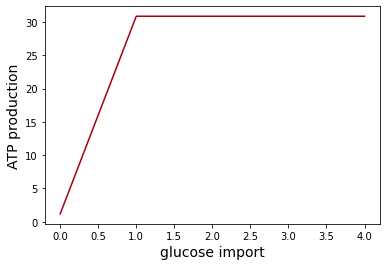

In [8]:
#to improve clarty of the graph, I need to invert X axis, and remove the negative - Exchange reactions are modelled
#as negative uptake, so -30 means -30 import.

new_glc_transport1 = range(0,5,1)

plt.plot(new_glc_transport1, ATP_production_1, color = '#A3000B')

plt.ylabel('ATP production', fontsize=14)
plt.xlabel('glucose import', fontsize=14)
plt.show()

1 molecule of imported glucose produces 31 molecules of ATP

In [9]:
data_dir= ("data")

In [10]:
data_fbat = pd.read_csv((join(data_dir, "fBAT_vs_iPSC.csv")))

In [11]:
data_fbat

Row.names    baseMean  log2FoldChange     lfcSE      stat  \
0      ENSG00000000003  916.532848        0.083847  0.190846  0.439345   
1      ENSG00000000005  598.773626       -3.889502  0.554859 -7.009898   
2      ENSG00000000419  444.156524        0.180388  0.126875  1.421776   
3      ENSG00000000457  126.726750       -0.263096  0.185195 -1.420646   
4      ENSG00000000460   68.771296       -0.194686  0.207111 -0.940008   
...                ...         ...             ...       ...       ...   
60651  ENSG00000288640    0.319881        0.000000  4.562036  0.000000   
60652  ENSG00000288642    0.000000             NaN       NaN       NaN   
60653  ENSG00000288643    0.000000             NaN       NaN       NaN   
60654  ENSG00000288644    0.000000             NaN       NaN       NaN   
60655  ENSG00000288645    0.000000             NaN       NaN       NaN   

             pvalue          padj      fBAT_1       fBAT_2       fBAT_3  \
0      6.604116e-01  8.014744e-01  612.604014   560.414932   514.271045   
1      2.384917e-12  6.107557e-11  968.673684  3910.145514  2377.191667   
2      1.550914e-01  2.991652e-01  334.520785   340.567393   344.596585   
3      1.554197e-01  2.996118e-01  121.084211   177.644663   142.561531   
4      3.472135e-01  5.287091e-01   69.777342    86.368676    78.714956   
...             ...           ...         ...          ...          ...   
60651  1.000000e+00           NaN    0.000000     0.000000     0.000000   
60652           NaN           NaN    0.000000     0.000000     0.000000   
60653           NaN           NaN    0.000000     0.000000     0.000000   
60654           NaN           NaN    0.000000     0.000000     0.000000   
60655           NaN           NaN    0.000000     0.000000     0.000000   

         Mean_fBAT   iPSC_BA_1   iPSC_BA_2   iPSC_BA_3  Mean_iPSC_BA  \
0       562.429997  612.053164  586.663408  588.742941    595.819838   
1      2418.670289  132.546545  183.591137  173.710373    163.282685   
2       339.894921  421.030202  364.421505  368.224384    384.558697   
3       147.096802  129.622724  114.571913  122.741461    122.312033   
4        78.286991   63.349452   63.497687   78.013641     68.286926   
...            ...         ...         ...         ...           ...   
60651     0.000000    0.000000    0.000000    0.000000      0.000000   
60652     0.000000    0.000000    0.000000    0.000000      0.000000   
60653     0.000000    0.000000    0.000000    0.000000      0.000000   
60654     0.000000    0.000000    0.000000    0.000000      0.000000   
60655     0.000000    0.000000    0.000000    0.000000      0.000000   

             Gene  
0          TSPAN6  
1            TNMD  
2            DPM1  
3           SCYL3  
4        C1orf112  
...           ...  
60651  AC005192.1  
60652        CDR1  
60653  AC114982.2  
60654  AC114402.2  
60655  AC084756.2  

[60656 rows x 16 columns]

In [12]:
model_fbat = cobra.io.read_sbml_model("4_universal_mito_model.xml")

In [14]:
list_of_genes=[] 
for gene in model_fbat.genes:
    list_of_genes.append(gene.id)

In [15]:
fbat_dictionary = read_csv_data(path=join(data_dir, "fBAT_vs_iPSC.csv"), #mTERF4_Inge_prot.csv
                                  list_of_genes=list_of_genes,
                                  id_gene=0,
                                  id_val=10,
                                  head=True)

In [16]:
#setting the objective function 
model_fbat.objective = model_fbat.reactions[420] #UCP1 production

linear_reaction_coefficients(model_fbat)

{<Reaction HtmB_mitoMap at 0x7f8b04bc6490>: 1.0}

In [17]:
#constrain the model using EFLUX
Eflux(model_fbat,fbat_dictionary,2000,1, ignore_mus=True)

488


In [18]:
#perform FBA
solution_fbat = model_fbat.optimize()
pfba_solution_fbat = cobra.flux_analysis.pfba(model_fbat)
print(solution_fbat, pfba_solution_fbat)

<Solution 80.413 at 0x7f8b04e13050> <Solution 1188.257 at 0x7f8b04ee2350>


In [19]:
model = model_fbat

c=0
e=0
for reaction in model.reactions:
    c+= reaction._upper_bound != 50.0 and reaction._upper_bound != 1000.0
    e+= reaction._upper_bound == 1000.0
u = len(model.reactions) - c - e
print(f"There are:{c} constrained reactions\n           {u} unconstrained reactions\n           {e} exchange reactions")

There are:488 constrained reactions
           0 unconstrained reactions
           72 exchange reactions


In [18]:
model_fbat.summary()

In [20]:
fbat_uptake_metabolites = ['a-ketogluterate','argininosuccinate', 'aspartate', 'butanoic acid','citrate', 'fe2', 'formate','fumarate', 'glucose', 'glutamine', 'glycine','H','O2','oxaloacetate']
fbat_uptake_flux = [-2.225, -0.2697, -0.6415, -0.4653, -2.227, -1.718, -4.372, -1.798, -5.229, -25.83, -18.27, -40.63, -4.311, -6.491]

fbat_secretion_metabolites = ['alanine', 'CO2', 'H20', 'hexadecanoic acid', 'lactate', 'malate', 'NH4', 'proline', 'serine', 'succinate', 'urea']
fbat_secretion_flux = [14.83, 51.42, 13.63, 0.4653, 1.969, 2.251, 36.65, 9.005, 4.447, 7.77, 0.2697]     

In [21]:
import matplotlib.pyplot as plt

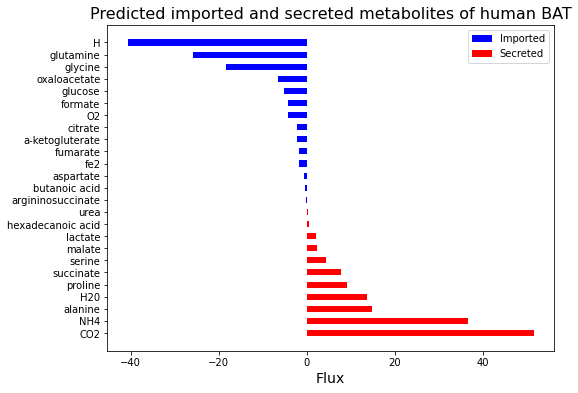

In [22]:
# Sort metabolites and fluxes based on flux values
sorted_uptake_metabolites, sorted_uptake_flux = zip(*sorted(zip(fbat_uptake_metabolites, fbat_uptake_flux), key=lambda x: x[1], reverse=True))
sorted_secretion_metabolites, sorted_secretion_flux = zip(*sorted(zip(fbat_secretion_metabolites, fbat_secretion_flux), key=lambda x: x[1], reverse=True))

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the size as needed

# Plot secreted metabolites first
ax.barh(sorted_secretion_metabolites, sorted_secretion_flux, color='red', label='Secreted', height=0.5)

# Plot imported metabolites
ax.barh(sorted_uptake_metabolites, sorted_uptake_flux, color='blue', label='Imported', height=0.5)

# Add labels and title with increased font size
ax.set_xlabel('Flux', fontsize=14)  # Increase font size here
ax.set_title('Predicted imported and secreted metabolites of human BAT', fontsize=16)  # Increase font size here

# Get the handles and labels of the legend
handles, labels = ax.get_legend_handles_labels()

# Reorder the handles and labels
handles = [handles[1], handles[0]]
labels = [labels[1], labels[0]]

# Create the legend with the reordered handles and labels
ax.legend(handles, labels)
# Save the figure as SVG
plt.savefig('human_BAT_rna.svg', format='svg')

# Show plot
plt.show()

In [30]:
#printing each reaction
for r in model_fbat.reactions:
    print(r)

EX_2hb_e: 2hb_e <=> 
EX_ac_e: ac_e <=> 
EX_acac_e: acac_e <=> 
EX_akg_e: akg_e <=> 
EX_ala_B_e: ala_B_e <=> 
EX_ala_L_e: ala_L_e <=> 
EX_arg_L_e: arg_L_e <=> 
EX_argsuc_e: argsuc_e <=> 
EX_asn_L_e: asn_L_e <=> 
EX_asp_L_e: asp_L_e <=> 
EX_bhb_e: bhb_e <=> 
EX_bilirub_e: bilirub_e <=> 
EX_biomass_e: biomass_e <=> 
EX_but_e: but_e <=> 
EX_chol_e: chol_e <=> 
EX_cit_e: cit_e <=> 
EX_citr_L_e: citr_L_e <=> 
EX_co_e: co_e <=> 
EX_co2_e: co2_e <=> 
EX_creat_e: creat_e <=> 
EX_cyan_e: cyan_e <=> 
EX_cys_L_e: cys_L_e <=> 
EX_etoh_e: etoh_e <=> 
EX_fe2_e: fe2_e <=> 
EX_for_e: for_e <=> 
EX_fum_e: fum_e <=> 
EX_glc_D_e: glc_D_e <=> 
EX_gln_L_e: gln_L_e <=> 
EX_glu_L_e: glu_L_e <=> 
EX_gly_e: gly_e <=> 
EX_glyc_e: glyc_e <=> 
EX_h_e: h_e <=> 
EX_h2o_e: h2o_e <=> 
EX_HC00250_e: HC00250_e <=> 
EX_hco3_e: hco3_e <=> 
EX_hdca_e: hdca_e <=> 
EX_his_L_e: his_L_e <=> 
EX_icit_e: icit_e <=> 
EX_ile_L_e: ile_L_e <=> 
EX_lac_L_e: lac_L_e <=> 
EX_leu_L_e: leu_L_e <=> 
EX_lys_L_e: lys_L_e <=> 
EX_mal_L_e: ma

In [31]:
#print the predicted flux for each reaction 
for f in pfba_solution_fbat.fluxes:
        print(f)

0.0
0.0
0.0
-2.224686325646602
0.0
14.832604794124235
0.0
-0.2697459035071387
-0.6415077485252201
-0.0460021682875813
0.0
0.0
1.7181879053387432
-0.46525700516346535
0.0
-2.22741460784367
0.0
0.0
51.41963287048375
0.0
0.0
0.0
0.0
-1.7181879053387432
-4.372432552938022
-1.7980380401739327
-5.228890801841759
-25.83488686677552
0.0
-18.267223319998493
0.0
-40.62743897056939
13.629134524584565
0.0
0.0
0.46525700516346535
0.0
0.0
0.0
1.9693485013461556
0.0
0.0
2.250702621053132
0.0
0.0
5.10702591327572e-15
0.0
36.648156620182334
0.0
-4.311484105571714
-6.490842198672016
0.0
0.0
0.0
0.0
5.329070518200751e-15
0.0
9.004917175127005
0.0
4.447076315113286
0.0
7.770065115449059
0.0
0.0
0.0
1.1102230246251565e-15
0.0
0.2697459035071387
1.7763568394002505e-15
0.0
0.0
1.7181879053387432
0.0
0.0
5.228890801841759
0.0
5.228890801841759
5.228890801841759
0.0
5.228890801841759
5.228890801841759
10.457781603683518
-10.457781603683518
-10.457781603683518
10.457781603683518
10.457781603683518
0.0
0.0
-1.96

In [25]:
#OXPHOS fluxes- fbat
print(pfba_solution_fbat.fluxes[107], model_fbat.reactions[107].id, model_fbat.reactions[107].reaction)
print(pfba_solution_fbat.fluxes[108], model_fbat.reactions[108].id, model_fbat.reactions[108].reaction)
print(pfba_solution_fbat.fluxes[109], model_fbat.reactions[109].id, model_fbat.reactions[109].reaction)
print(pfba_solution_fbat.fluxes[110], model_fbat.reactions[110].id, model_fbat.reactions[110].reaction)
print(pfba_solution_fbat.fluxes[111], model_fbat.reactions[111].id, model_fbat.reactions[111].reaction)
print(pfba_solution_fbat.fluxes[420], model_fbat.reactions[420].id, model_fbat.reactions[420].reaction)

0.051681840119161146 CI_mitoMap 3.996 PMF_m + h_m + nadh_m + 0.002 o2_m + 0.999 q10_m <=> 3.996 PMF_c + nad_m + 0.002 o2s_m + 0.999 q10h2_m
-2.0677839436810714 CII_mitoMap q10_m + succ_m <=> fum_m + q10h2_m
0.0319253207694743 CIII_mitoMap 2.0 PMF_m + 2.0 ficytC_m + q10h2_m <=> 4.0 PMF_c + 2.0 focytC_m + q10_m
0.015962660384736458 CIV_mitoMap 8.0 PMF_m + 4.0 focytC_m + o2_m --> 4.0 PMF_c + 4.0 ficytC_m + 2.0 h2o_m
-0.017912826398697942 CV_mitoMap 2.7 PMF_c + adp_m + h_m + pi_m <=> 2.7 PMF_m + atp_m + h2o_m
80.41271729164279 HtmB_mitoMap PMF_c + h_c --> PMF_m + h_m
